### Activity Recognition system based on Multisensor data fusion (AReM) Experiment 

**Task Logistic Regression**
- 1. WAP to read folder name and make a label in the csv with folder name 
- 2. Remove unnecessary info in Automated way 
- 3. No other algorithm must be used other than Logistic Regression 
- 4. Try to utilize multiple solvers and make multiple models 
- 5. Provide the best models 
- 6. EDA and all must be done accordingly 
- Note: No manual approaches will be appreciated

In [161]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport 
import seaborn as sns
import pickle
import os,csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import scipy.stats as stats

In [162]:
location = os.getcwd() + "\AReM"  # get present working directory location here
counter = 0 #keep a count of all files found
#csvfiles = [] #list to store all csv files found at location
total_file_cnt=0
df_all = pd.DataFrame()

for fol in next(os.walk('AReM'))[1]:
    print ("Folder Name:\t", fol)
    
    counter=0
    for file in os.listdir(os.getcwd() + "\AReM" + "\\" + fol):    
        filepath=""
        try:
            if file.endswith(".csv"):     
                filepath=os.getcwd() + "\AReM" + "\\" + fol + "\\" + file
                print ("csv file found:\t", filepath)
                #csvfiles.append(str(file))                
                df = pd.read_csv(filepath,skiprows=4,encoding='utf-8', error_bad_lines=False,quoting=csv.QUOTE_NONE)
                df["target"] = fol.replace("1","").replace("2","")                
                df_all = df_all.append(df)                
                #print ("df shape:\t", df.shape)
                counter = counter+1
                total_file_cnt = total_file_cnt + 1            
        except Exception as e:
            print(e)
            print( "No files found here!")

    print (f"Total files in {fol} folder found:{counter}".format(fol=fol,counter=counter))
print ("Total files found:\t", total_file_cnt)


Folder Name:	 bending1
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\bending1\dataset1.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\bending1\dataset2.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\bending1\dataset3.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\bending1\dataset4.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\bending1\dataset5.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\bending1\dataset6.csv
csv file found:	 C:\Use

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\sitting\dataset2.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\sitting\dataset3.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\sitting\dataset4.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\sitting\dataset5.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\sitting\dataset6.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1.Full_Stack_DataScience-iNeuron\Assignments_Class\11SEP-logireg\AReM\sitting\dataset7.csv
csv file found:	 C:\Users\ashok\OneDrive\Moved\Trainings\1.iNeuron\1

In [163]:
df_all.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'target'],
      dtype='object')

In [164]:
df_all

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending
...,...,...,...,...,...,...,...,...
475,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
477,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
478,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [165]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42237 entries, 0 to 479
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   # Columns: time  42237 non-null  object 
 1   avg_rss12        41757 non-null  float64
 2   var_rss12        41757 non-null  float64
 3   avg_rss13        41757 non-null  float64
 4   var_rss13        41757 non-null  float64
 5   avg_rss23        41757 non-null  float64
 6   var_rss23        41757 non-null  float64
 7   target           42237 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.9+ MB


In [166]:
df_all.shape

(42237, 8)

In [167]:
#df_all.to_csv("dataset_all.csv")

In [170]:
df_all.value_counts("target")

target
walking     7200
standing    7200
lying       7200
sitting     7199
cycling     7198
bending     6240
dtype: int64

<AxesSubplot:xlabel='target'>

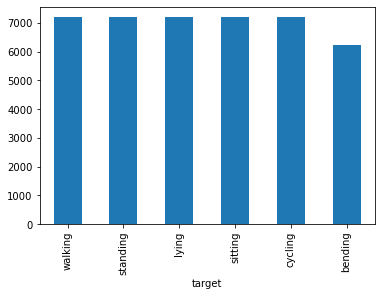

In [171]:
df_all.value_counts("target").plot(kind="bar")

In [172]:
df_all.shape

(42237, 8)

In [173]:
df_all.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'target'],
      dtype='object')

In [174]:
#We can drop the time column as there is significance in the experiment  
df_all.drop("# Columns: time",axis=1,inplace=True)

In [175]:
df_all

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.43,33.75,1.30,bending
1,39.25,0.43,23.00,0.00,33.00,0.00,bending
2,39.25,0.43,23.25,0.43,33.00,0.00,bending
3,39.50,0.50,23.00,0.71,33.00,0.00,bending
4,39.50,0.50,24.00,0.00,33.00,0.00,bending
...,...,...,...,...,...,...,...
475,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,27.33,1.25,11.33,0.94,20.00,4.00,walking
477,37.80,7.68,14.20,2.48,17.25,0.83,walking
478,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [176]:
above_0_missing = df_all.isnull().sum() > 0
df_all.isnull().sum()[above_0_missing]

avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
dtype: int64

In [177]:
df_all_profile=ProfileReport(df_all)

In [178]:
df_all_profile.widgets

**Handling null and zero values**

In [179]:
def handling_null_zeros(df_all):     
    df_all['avg_rss12'].fillna(df_all['avg_rss12'].mean(), inplace=True)
    df_all['avg_rss12'] = df_all['avg_rss12'].replace(
        0, df_all['avg_rss12'].mean())

    df_all['var_rss12'].fillna(df_all['var_rss12'].mean(), inplace=True)
    df_all['var_rss12'] = df_all['var_rss12'].replace(
        0, df_all['var_rss12'].mean())

    df_all['avg_rss13'].fillna(df_all['avg_rss13'].mean(), inplace=True)
    df_all['avg_rss13'] = df_all['avg_rss13'].replace(
        0, df_all['avg_rss13'].mean())

    df_all['var_rss13'].fillna(df_all['var_rss13'].mean(), inplace=True)
    df_all['var_rss13'] = df_all['var_rss13'].replace(
        0, df_all['var_rss13'].mean())

    df_all['avg_rss23'] = df_all['avg_rss23'].replace(
        0, df_all['avg_rss23'].mean())
    df_all['avg_rss23'].fillna(df_all['avg_rss23'].mean(), inplace=True)

    df_all['var_rss23'] = df_all['var_rss23'].replace(
        0, df_all['var_rss23'].mean())
    df_all['var_rss23'].fillna(df_all['var_rss23'].mean(), inplace=True)


handling_null_zeros(df_all)

In [180]:
above_0_missing = df_all.isnull().sum() > 0
df_all.isnull().sum()[above_0_missing]

Series([], dtype: int64)

In [49]:
#for col in ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']:
#    df_all[col] = df_all[col].mean()            

In [181]:
numerical_features = df_all.select_dtypes(include='number').columns.tolist()
numerical_features

['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

In [182]:
df_all_profile1=ProfileReport(df_all)
df_all_profile1.widgets

In [183]:
df_all

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.430000,33.75,1.300000,bending
1,39.25,0.43,23.00,1.513225,33.00,1.631255,bending
2,39.25,0.43,23.25,0.430000,33.00,1.631255,bending
3,39.50,0.50,23.00,0.710000,33.00,1.631255,bending
4,39.50,0.50,24.00,1.513225,33.00,1.631255,bending
...,...,...,...,...,...,...,...
475,31.50,1.66,12.50,3.200000,14.25,4.440000,walking
476,27.33,1.25,11.33,0.940000,20.00,4.000000,walking
477,37.80,7.68,14.20,2.480000,17.25,0.830000,walking
478,33.75,1.30,15.75,5.210000,16.50,2.690000,walking


In [184]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rss12,42237.0,39.023105,6.255938,12.50,35.25,39.750000,43.75,56.25
var_rss12,42237.0,1.832098,1.875875,0.26,0.50,1.472967,1.79,17.24
avg_rss13,42237.0,14.464328,5.225144,1.00,11.75,15.000000,18.00,35.00
var_rss13,42237.0,1.808189,1.462711,0.24,0.71,1.513225,2.29,11.42
avg_rss23,42237.0,16.114887,6.605666,1.00,12.25,16.000000,19.25,40.33
var_rss23,42237.0,1.822051,1.524489,0.24,0.82,1.410000,2.29,13.61


In [185]:
df_all.shape[1]
numerical_features

['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

In [186]:
def vif_score(x):
    scaler = StandardScaler()
    arr=scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns=['FEATURE','VIF_SCORE'])

In [187]:
print(vif_score(df_all[numerical_features]))

     FEATURE  VIF_SCORE
0  avg_rss12   1.188693
1  var_rss12   1.513248
2  avg_rss13   1.315090
3  var_rss13   1.440020
4  avg_rss23   1.280323
5  var_rss23   1.495452


<AxesSubplot:>

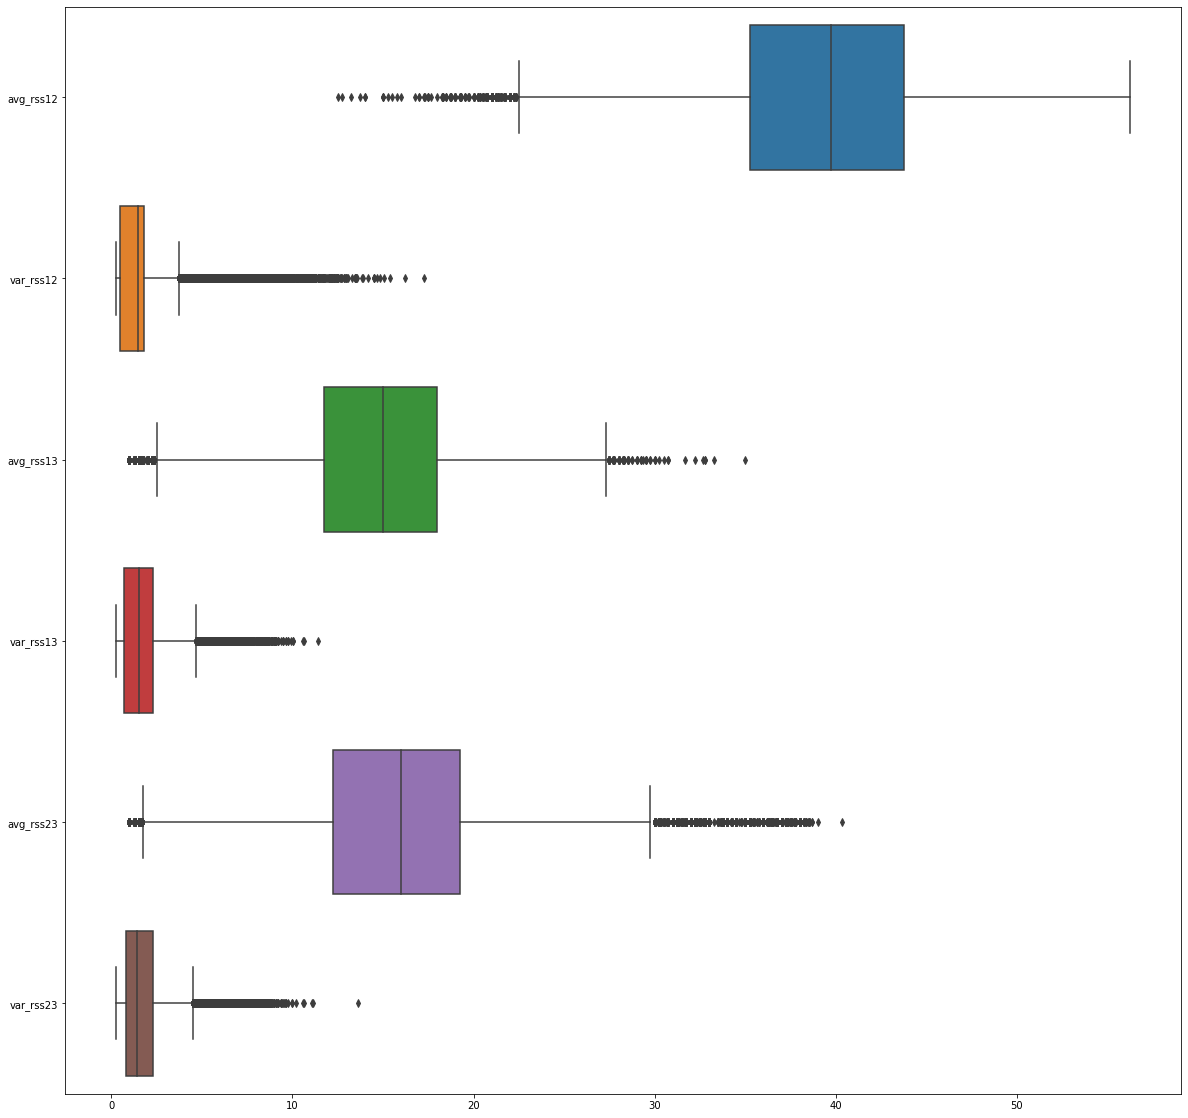

In [316]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df_all,ax=ax,orient="h")

In [315]:
df_all.columns

Index(['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'target'],
      dtype='object')

In [300]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_iqr(df_all["avg_rss12"])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [12.5, 12.75, 13.25, 13.75, 14.0, 14.0, 15.0, 15.0, 15.0, 15.25, 15.5, 15.75, 16.0, 16.75, 17.0, 17.0, 17.25, 17.25, 17.33, 17.5, 17.5, 17.5, 17.67, 18.0, 18.25, 18.25, 18.33, 18.33, 18.33, 18.5, 18.5, 18.5, 18.67, 18.67, 18.75, 18.75, 18.75, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.25, 19.25, 19.25, 19.25, 19.25, 19.33, 19.33, 19.33, 19.5, 19.5, 19.5, 19.5, 19.67, 19.75, 19.75, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.25, 20.33, 20.33, 20.33, 20.33, 20.33, 20.33, 20.33, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.67, 20.67, 20.67, 20.67, 20.67, 20.67, 20.67, 20.67, 20.67, 20.67, 20.67, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 20.75, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.

In [232]:
#df['avg_rss12']=pd.Series(b)

Text(0.5, 0, 'avg_rss12')

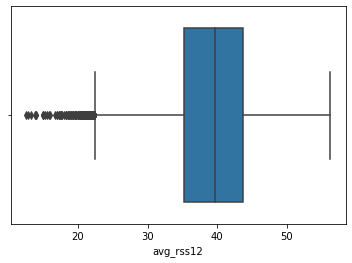

In [295]:
ax = sns.boxplot(x=df_all["avg_rss12"])
ax.set_xlabel('avg_rss12')

In [195]:
df_all_new = df_all.copy()

In [299]:
len(df_all['avg_rss12'])

42237

In [196]:
df_all_new.shape

(42237, 7)

In [197]:
df_all.shape

(42237, 7)

In [222]:
df_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42237 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_rss12  42237 non-null  float64
 1   var_rss12  42237 non-null  float64
 2   avg_rss13  42237 non-null  float64
 3   var_rss13  42237 non-null  float64
 4   avg_rss23  42237 non-null  float64
 5   var_rss23  42237 non-null  float64
 6   target     42237 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [199]:
print(vif_score(df_all[numerical_features]))

     FEATURE  VIF_SCORE
0  avg_rss12   1.188693
1  var_rss12   1.513248
2  avg_rss13   1.315090
3  var_rss13   1.440020
4  avg_rss23   1.280323
5  var_rss23   1.495452


In [200]:
enc = LabelEncoder()
y = enc.fit_transform(df_all.target)

In [304]:
x=df_all.drop(columns=['target'])

In [305]:
x

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,39.25,0.43,22.75,0.430000,33.75,1.300000
1,39.25,0.43,23.00,1.513225,33.00,1.631255
2,39.25,0.43,23.25,0.430000,33.00,1.631255
3,39.50,0.50,23.00,0.710000,33.00,1.631255
4,39.50,0.50,24.00,1.513225,33.00,1.631255
...,...,...,...,...,...,...
475,31.50,1.66,12.50,3.200000,14.25,4.440000
476,27.33,1.25,11.33,0.940000,20.00,4.000000
477,37.80,7.68,14.20,2.480000,17.25,0.830000
478,33.75,1.30,15.75,5.210000,16.50,2.690000


In [306]:
y[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [307]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=144,stratify=y)

In [308]:
print('x_train.shape',x_train.shape)
print('x_test.shape',x_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

x_train.shape (33789, 6)
x_test.shape (8448, 6)
y_train.shape (33789,)
y_test.shape (8448,)


In [309]:
#'sag', 'saga' and 'newton-cg' 

In [312]:
logr = LogisticRegression(solver='saga')
logr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [313]:
logr.score(x_test, y_test)

0.6348248106060606

Text(0.5, 117.59999999999997, 'Predicted label')

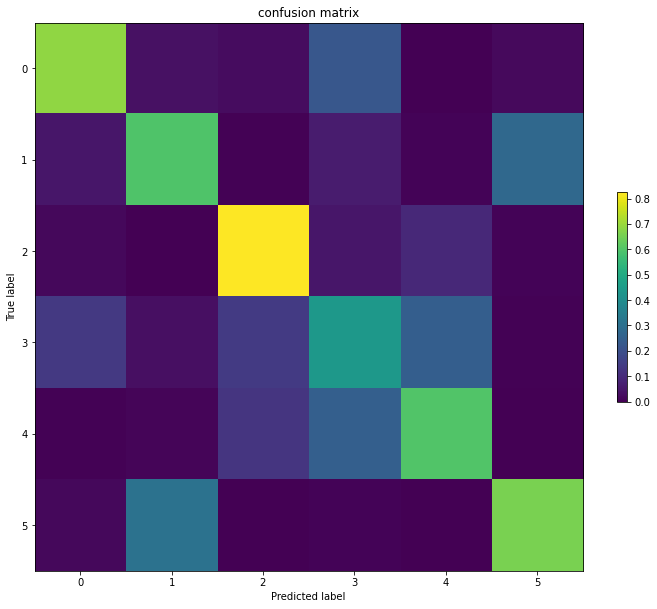

In [317]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, logr.predict(x_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [323]:
y_pred = logr.predict(x_test)

print("classification_report:", classification_report(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("confusion_matrix:", confusion_matrix(y_test, y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.73      0.69      0.71      1248
           1       0.60      0.60      0.60      1440
           2       0.74      0.83      0.78      1440
           3       0.44      0.44      0.44      1440
           4       0.63      0.60      0.62      1440
           5       0.68      0.66      0.67      1440

    accuracy                           0.63      8448
   macro avg       0.64      0.64      0.64      8448
weighted avg       0.63      0.63      0.63      8448

accuracy_score: 0.6348248106060606
confusion_matrix: [[ 860   46   34  279    2   27]
 [  72  861    5   89   11  402]
 [  26    2 1190   72  137   13]
 [ 196   48  204  633  354    5]
 [   7   18  182  360  869    4]
 [  25  450    0   13    2  950]]


**Observations**

- "# Columns: time" feature can be removed as this will not contribute to model training.
- avg_rss12, var_rss12,avg_rss13, var_rss13, avg_rss23,and var_rss23 have null values and zeros
- avg_rss12, var_rss12, var_rss13, avg_rss23,and var_rss23 features have outliers.
- avg_rss13 has outliers, but it negligible. 
- Used labelencoder to encode the target 
- vif score is less than 10 hence not need to remove any feature.